# Sampling the World

Using a Random Walk Metropolis sampler and [data from Kaggle](https://www.kaggle.com/max-mind/world-cities-database), we are going to see if we can randomly stumble our way across the entire world!

#### Import dependencies

In [56]:
import pandas as pd
import matplotlib.pylab as plt
from plotnine import *
%matplotlib notebook

#### Get Longitude, Latitude and Population data from Kaggle

In [32]:
all_kaggle_world_data = pd.read_csv('worldcitiespop.csv')

C:\Users\lewis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [60]:
print(all_kaggle_world_data.shape)
all_kaggle_world_data.head(3)

(3173958, 7)


,Country,City,AccentCity,Region,Population,Latitude,Longitude
0,ad,aixas,Aixàs,6,NaN,42.483333,1.466667
1,ad,aixirivali,Aixirivali,6,NaN,42.466667,1.500000
2,ad,aixirivall,Aixirivall,6,NaN,42.466667,1.500000


#### Process the raw Kaggle data

Examining our raw data, we can see that we don't always have population data - we can exclude these points from our work. We also have columns that aren't of particular interest to us, such as city name, so we can drop these columns completely too.

In [49]:
pop_exists_df = all_kaggle_world_data[all_kaggle_world_data["Population"].notnull()]

In [62]:
long_lat_pop = pop_exists_df[["Longitude", "Latitude", "Population"]].reset_index(drop=True)
print(long_lat_pop.shape)
long_lat_pop.head(3)

(47980, 3)


,Longitude,Latitude,Population
0,1.516667,42.500000,20430.0
1,1.600000,42.566667,3292.0
2,1.583333,42.533333,11224.0


For clarity, we will also exclude any cities with very small populations. We should also ensure we do not have any duplicate entires and remove these if we do.

In [63]:
# remove cities with very low populations
long_lat_pop = long_lat_pop[long_lat_pop["Population"]>10000]
# drop duplicates
long_lat_pop = long_lat_pop.drop_duplicates()

long_lat_pop.shape

(25074, 3)

#### Plot our process data

We can now take our first look at our data! We can see that we have population data for cities around the entire world, with the data nicely forming an outline of the world map we are used to seeing.

<IPython.core.display.Javascript object>


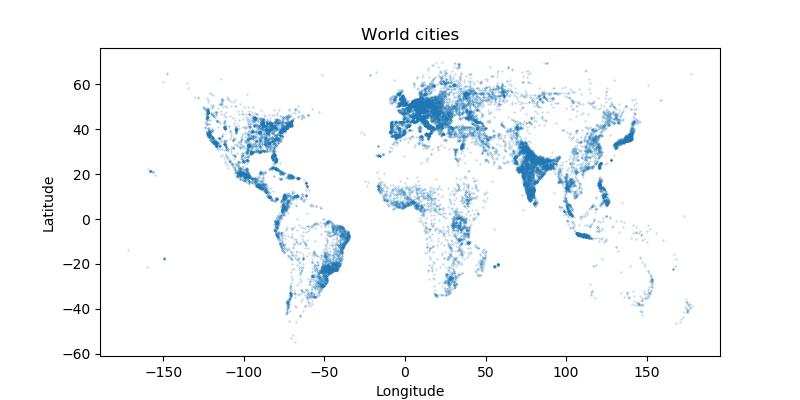

In [59]:
fig = plt.figure(figsize=(8,4))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('World cities')

plt.scatter(long_lat_pop["Longitude"], long_lat_pop["Latitude"], s=0.1, alpha=0.5)